In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,4.0,North,New Property,NaN,1727.0,NaN,1017.0,0,0,1,0,0,1,142
1,flat,tulip violet,sector 69,1.43,8886.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,1.0,North-West,Relatively New,NaN,1608.0,NaN,NaN,0,0,0,1,0,0,86
2,flat,godrej frontier,sector 80,1.60,7000.0,2286.0,Super Built up area 2262(210.15 sq.m.),3.0,3.0,3,5.0,NaN,Moderately Old,NaN,2262.0,NaN,NaN,0,1,0,0,0,0,53
3,flat,indiabulls centrum park,sector 103,2.45,8521.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,11.0,East,Relatively New,NaN,2875.0,NaN,NaN,1,1,1,1,0,0,38
4,house,my home,new sector 2,0.34,12592.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,NaN,West,Moderately Old,3.0,NaN,270.0,NaN,0,0,0,0,0,0,22


In [5]:
df.shape

(3677, 24)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'noOfFloor', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

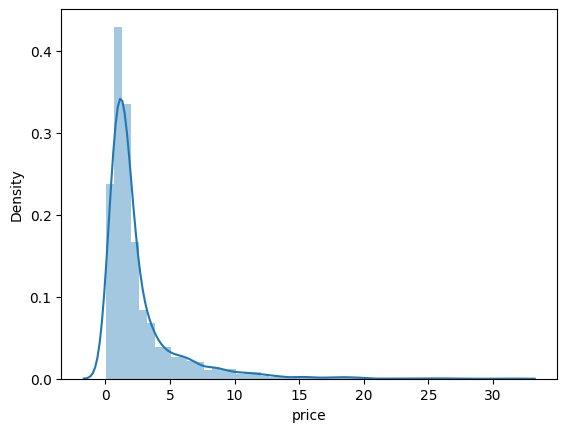

In [7]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

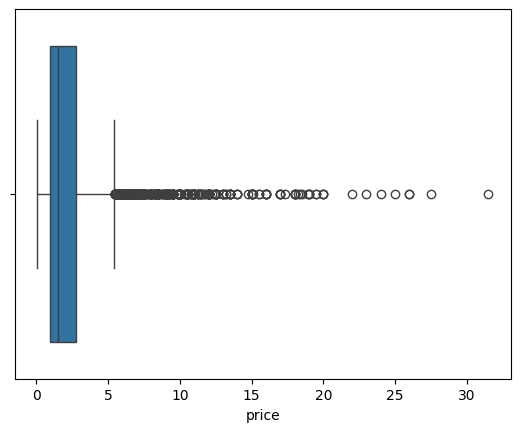

In [8]:
sns.boxplot(x=df['price'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3656,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9.0,3+,NaN,North-East,Moderately Old,3.0,NaN,NaN,NaN,1,1,1,1,0,2,74
1444,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,NaN,North-East,Relatively New,3.0,NaN,NaN,NaN,1,1,0,1,1,1,42
1594,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,NaN,North-West,New Property,4.0,NaN,400.0,350.0,1,1,1,1,0,1,72
2553,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,NaN,North-East,New Property,2.0,NaN,NaN,NaN,1,1,0,1,1,1,138
885,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,NaN,North,Moderately Old,2.0,NaN,NaN,NaN,1,1,1,1,0,0,0
1698,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,NaN,North-East,Old Property,1.0,NaN,NaN,NaN,1,1,0,1,0,1,122
3280,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,NaN,South-West,Relatively New,2.0,NaN,NaN,NaN,1,1,1,1,0,1,145
2074,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5.0,6.0,3,NaN,NaN,Moderately Old,3.0,NaN,NaN,NaN,0,1,0,0,0,0,54
1045,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,NaN,NaN,New Property,4.0,NaN,NaN,NaN,0,1,0,0,0,1,31
2407,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,NaN,West,Relatively New,3.0,NaN,NaN,NaN,0,1,0,1,0,2,97


* on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

# Price_per_sqft

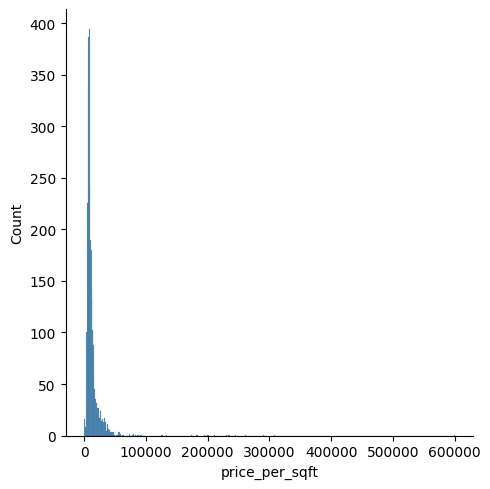

In [12]:
sns.displot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

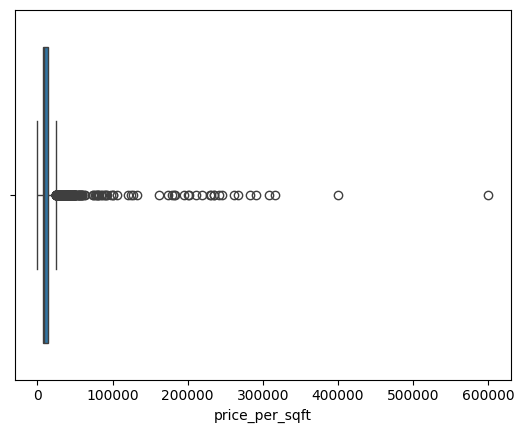

In [13]:
sns.boxplot(x=df['price_per_sqft'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [16]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [17]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [18]:
df.update(outliers_sqft)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

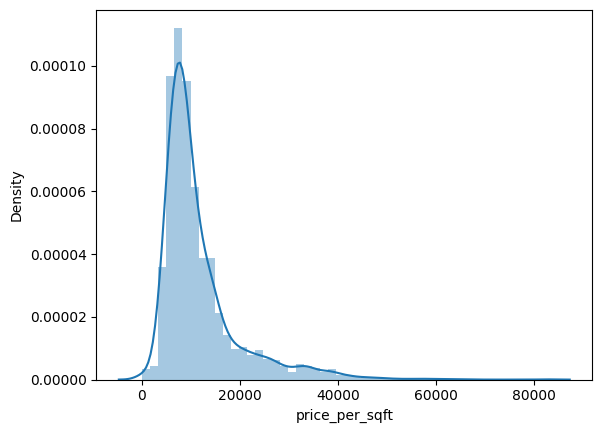

In [19]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

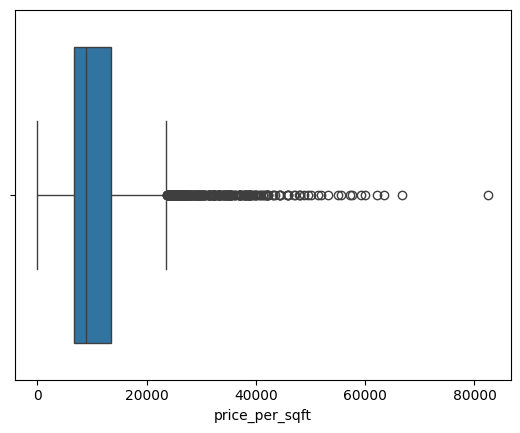

In [20]:
sns.boxplot(x=df['price_per_sqft'])

In [21]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
64,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,NaN,1565.0,NaN,0,0,0,0,0,0,0
240,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,NaN,North,New Property,4.0,NaN,1600.0,NaN,0,0,0,0,0,1,99
256,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,NaN,NaN,Undefined,1.0,NaN,140.0,NaN,0,0,0,0,0,0,0
469,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,NaN,West,New Property,4.0,NaN,325.0,300.0,1,1,1,1,0,1,72
773,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,NaN,South,Relatively New,4.0,NaN,NaN,NaN,1,1,0,1,1,2,137
1221,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,NaN,North,Old Property,2.0,NaN,NaN,NaN,1,1,0,0,0,1,160
1594,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,NaN,North-West,New Property,4.0,NaN,400.0,350.0,1,1,1,1,0,1,72
1673,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,NaN,East,New Property,4.0,NaN,NaN,NaN,1,1,1,1,0,1,153
1698,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,NaN,North-East,Old Property,1.0,NaN,NaN,NaN,1,1,0,1,0,1,122
1769,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,NaN,East,Moderately Old,3.0,NaN,NaN,NaN,1,1,0,1,0,2,75


In [22]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

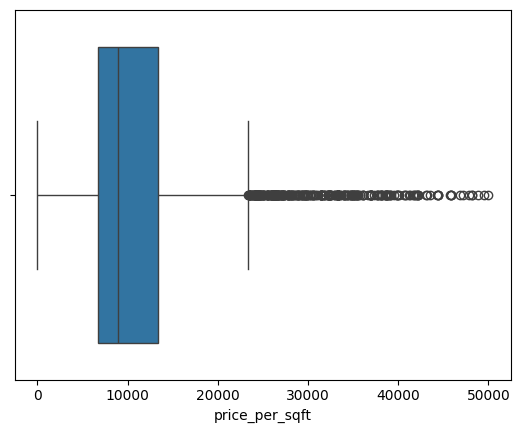

In [23]:
sns.boxplot(x=df['price_per_sqft'])

# Area

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

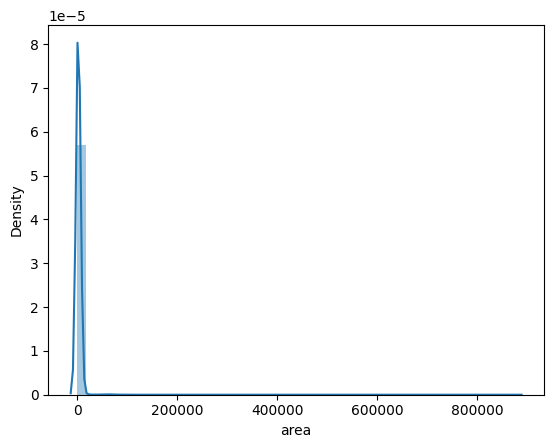

In [24]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

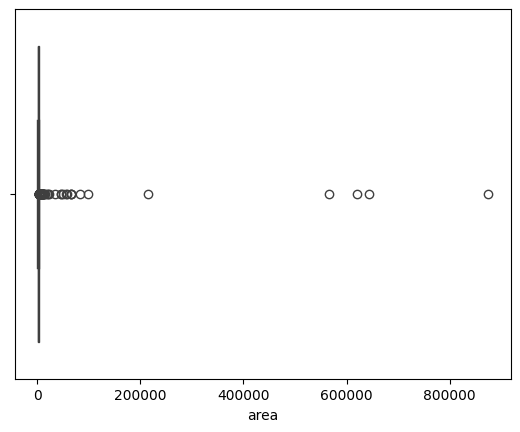

In [25]:
sns.boxplot(x=df['area'])

In [26]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [27]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
77,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,NaN,514396.0,0,0,0,0,0,0,44
1630,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,NaN,607936.0,1,0,0,0,1,0,65
1805,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,NaN,569243.0,0,0,0,0,0,0,76
3249,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,NaN,737147.0,NaN,0,0,0,0,0,2,44
3726,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,NaN,NaN,New Property,2.0,NaN,NaN,NaN,1,1,0,1,1,1,0


In [28]:
df = df[df['area'] < 100000]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

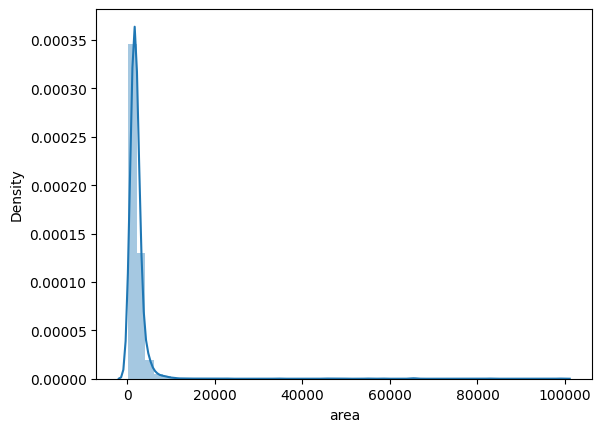

In [29]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

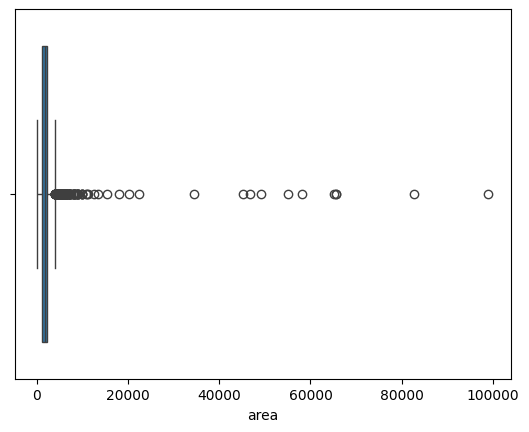

In [30]:
sns.boxplot(x=df['area'])

In [31]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3171,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,NaN,South,Relatively New,4.0,NaN,NaN,11000.00,0,1,1,1,0,1,60
1786,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,NaN,South-East,Old Property,3.0,NaN,NaN,NaN,0,0,0,0,1,0,7
183,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,NaN,64529.00,1,0,0,0,0,0,15
3177,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,NaN,64412.00,0,0,0,0,0,0,51
2959,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,NaN,NaN,Undefined,1.0,NaN,NaN,7250.00,0,0,0,0,0,0,0
278,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,NaN,58141.00,0,0,0,0,0,0,15
793,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,NaN,54917.00,0,0,0,0,0,0,37
3752,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,NaN,48811.00,1,0,0,0,0,0,37
3581,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,NaN,North-West,Relatively New,3.0,NaN,5800.0,5200.00,0,1,1,0,0,1,109
473,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [32]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [33]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3171,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,NaN,South,Relatively New,4.0,NaN,NaN,11000.00,0,1,1,1,0,1,60
1786,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,NaN,South-East,Old Property,3.0,NaN,NaN,NaN,0,0,0,0,1,0,7
183,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,NaN,64529.00,1,0,0,0,0,0,15
3177,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,NaN,64412.00,0,0,0,0,0,0,51
2959,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,NaN,NaN,Undefined,1.0,NaN,NaN,7250.00,0,0,0,0,0,0,0
278,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,NaN,58141.00,0,0,0,0,0,0,15
793,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,NaN,54917.00,0,0,0,0,0,0,37
3752,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,NaN,48811.00,1,0,0,0,0,0,37
3581,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,NaN,North-West,Relatively New,3.0,NaN,5800.0,5200.00,0,1,1,0,0,1,109
473,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [34]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

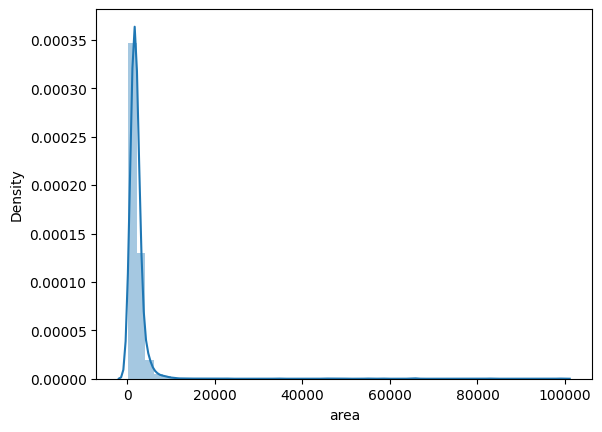

In [35]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

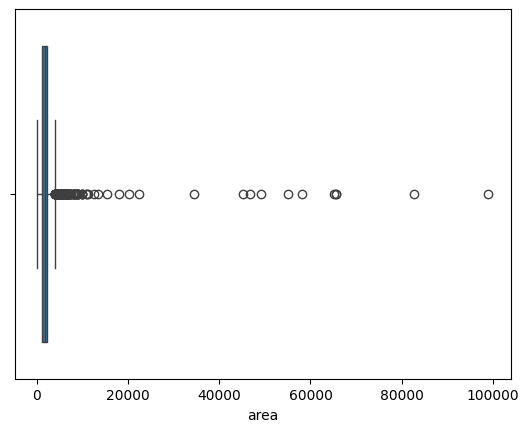

In [36]:
sns.boxplot(x=df['area'])

In [37]:
df['area'].describe()

count     3634.000000
mean      2151.729499
std       3628.578889
min        145.000000
25%       1261.000000
50%       1750.000000
75%       2342.500000
max      98978.000000
Name: area, dtype: float64

# Bedroom

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

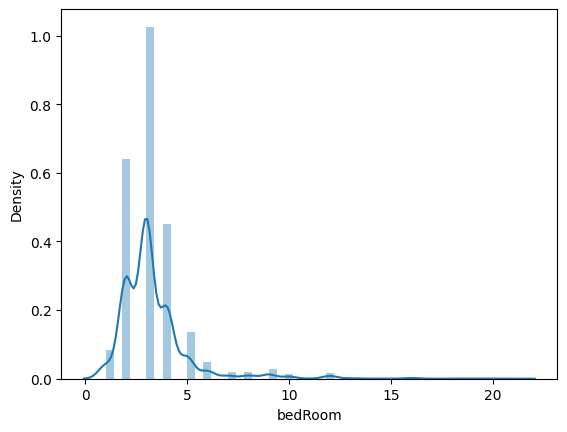

In [38]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

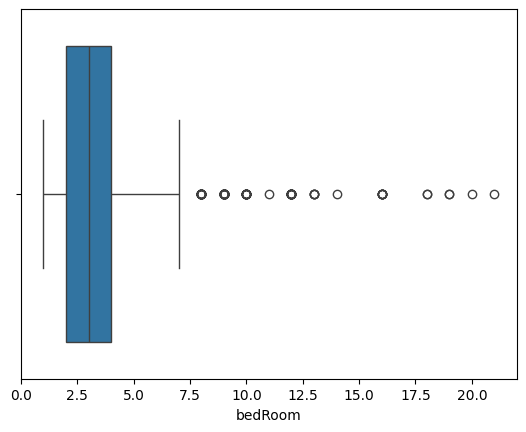

In [39]:
sns.boxplot(x=df['bedRoom'])

In [40]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333058
std         1.831037
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [41]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3119,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,NaN,North,Relatively New,5.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,49.0
3728,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,NaN,East,Relatively New,4.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,22.0
585,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,NaN,North-West,Relatively New,5.0,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,68.0
3287,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,NaN,North-West,Relatively New,4.0,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,74.0
1436,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,NaN,South-West,Relatively New,4.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,70.0
1668,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,NaN,North-East,Relatively New,4.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,2.0,57.0
63,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,NaN,West,New Property,4.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,49.0
873,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,NaN,NaN,New Property,4.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2910,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,NaN,North-East,New Property,4.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,153.0
1546,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,NaN,South,Relatively New,4.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,20.0


In [42]:
df = df[df['bedRoom'] <= 10]

In [43]:
df.shape

(3588, 24)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

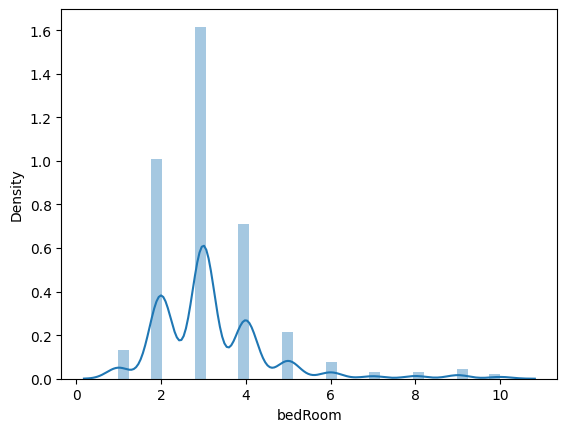

In [44]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

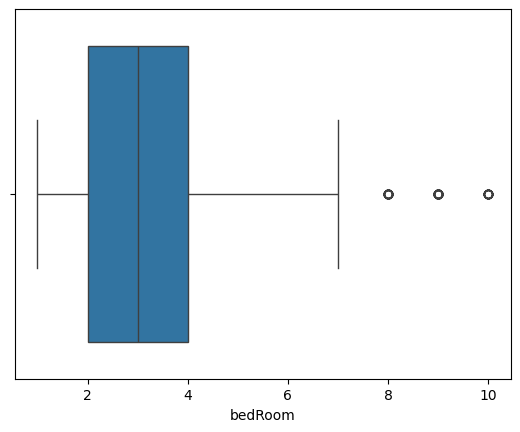

In [45]:
sns.boxplot(x=df['bedRoom'])

In [46]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203177
std         1.395249
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

# Bathroom

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

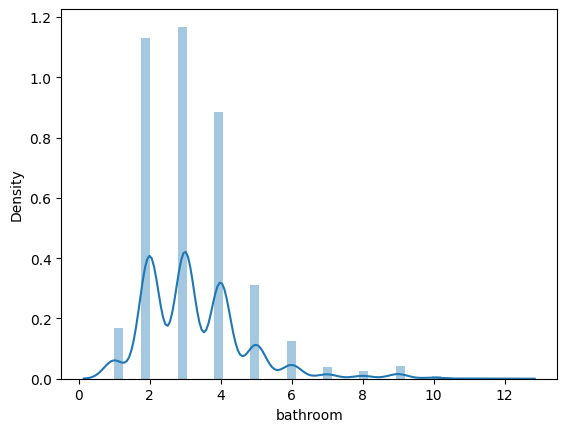

In [47]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

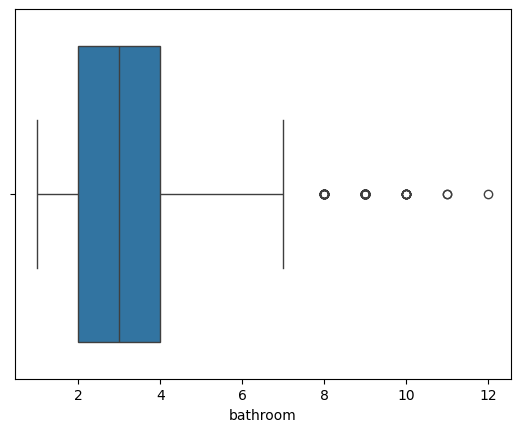

In [48]:
sns.boxplot(x=df['bathroom'])

In [49]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3750,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,NaN,North-East,Relatively New,3.0,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,146.0
1537,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,NaN,South-East,Relatively New,4.0,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,38.0
3017,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,NaN,East,Old Property,3.0,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,39.0


In [50]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,4.0,North,New Property,NaN,1727.0,NaN,1017.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0
1,flat,tulip violet,sector 69,1.43,8886.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,1.0,North-West,Relatively New,NaN,1608.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,86.0
3,flat,indiabulls centrum park,sector 103,2.45,8521.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,11.0,East,Relatively New,NaN,2875.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,38.0
4,house,my home,new sector 2,0.34,12592.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,NaN,West,Moderately Old,3.0,NaN,270.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,22.0
5,house,ansals palam vihar,sector 2,5.70,14729.0,3870.0,Plot area 430(359.53 sq.m.)Built Up area: 4550...,5.0,5.0,2,NaN,North-East,Old Property,2.0,NaN,4550.0,4450.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0


# super built up area

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

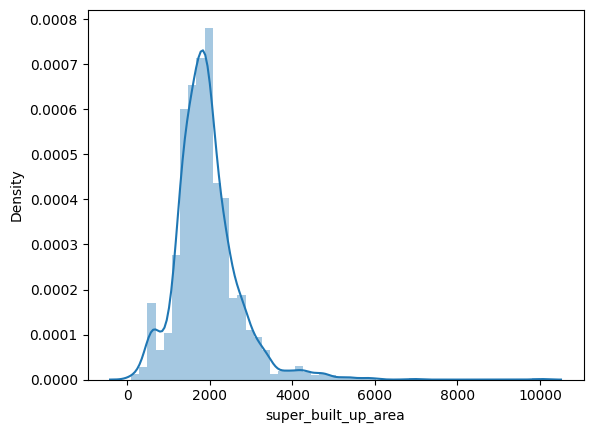

In [51]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

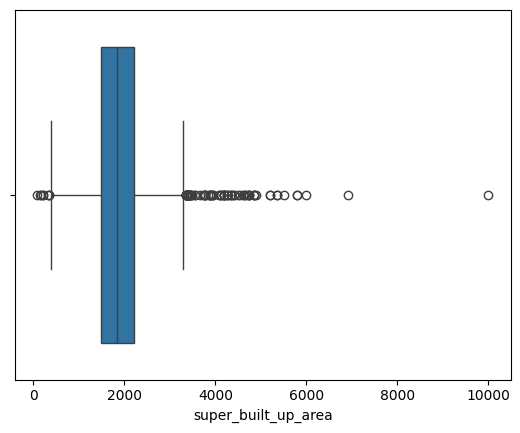

In [52]:
sns.boxplot(x=df['super_built_up_area'])

In [53]:
df['super_built_up_area'].describe()

count     1872.000000
mean      1925.294097
std        764.411737
min         89.000000
25%       1479.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [54]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
343,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,NaN,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,140.0
3296,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,NaN,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,49.0


# built up area

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

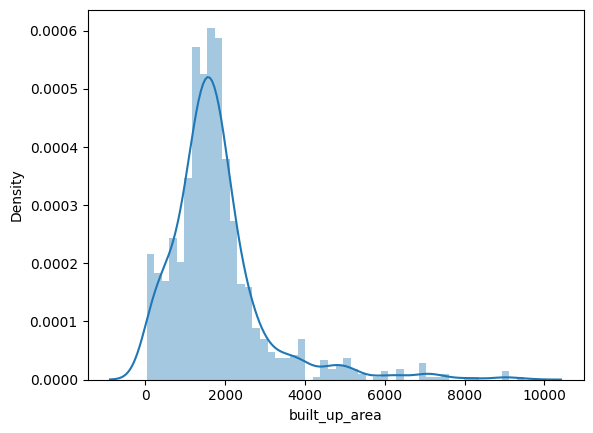

In [55]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

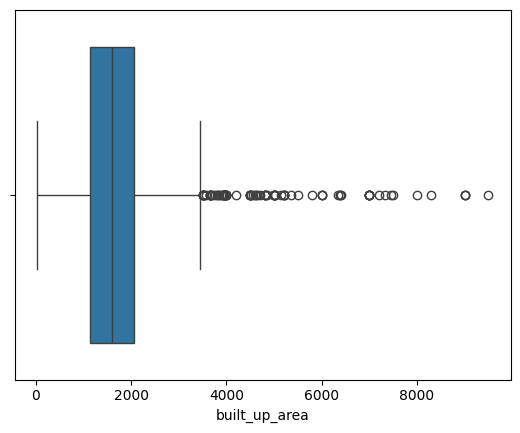

In [56]:
sns.boxplot(x=df['built_up_area'])

In [57]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


# carpet area

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

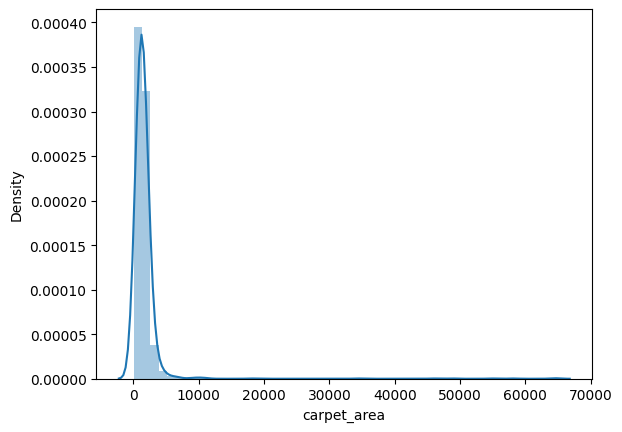

In [58]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

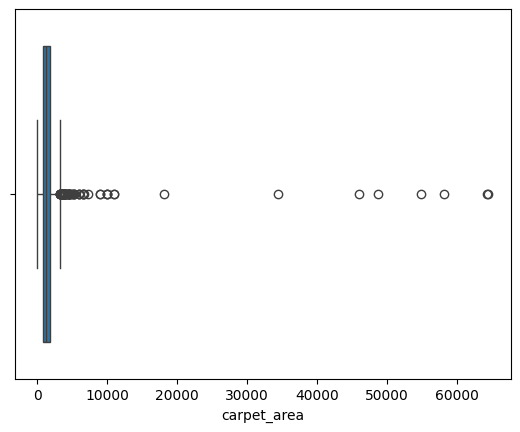

In [59]:
sns.boxplot(x=df['carpet_area'])

In [60]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
183,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,NaN,64529.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0
278,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
473,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0
793,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1474,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,1.0,44.0
2141,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2154,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0
3171,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,NaN,South,Relatively New,4.0,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,1.0,60.0
3177,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
3752,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,NaN,48811.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0


In [61]:
df.loc[2131,'carpet_area'] = 1812

In [62]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
183,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,NaN,64529.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0
278,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
473,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0
793,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1474,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,1.0,44.0
2141,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2154,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0
3171,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,NaN,South,Relatively New,4.0,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,1.0,60.0
3177,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
3752,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,NaN,48811.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0


In [63]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,4.0,North,New Property,NaN,1727.0,NaN,1017.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0
1,flat,tulip violet,sector 69,1.43,8886.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,1.0,North-West,Relatively New,NaN,1608.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,86.0
3,flat,indiabulls centrum park,sector 103,2.45,8521.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,11.0,East,Relatively New,NaN,2875.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,38.0
4,house,my home,new sector 2,0.34,12592.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,NaN,West,Moderately Old,3.0,NaN,270.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,22.0
5,house,ansals palam vihar,sector 2,5.70,14729.0,3870.0,Plot area 430(359.53 sq.m.)Built Up area: 4550...,5.0,5.0,2,NaN,North-East,Old Property,2.0,NaN,4550.0,4450.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

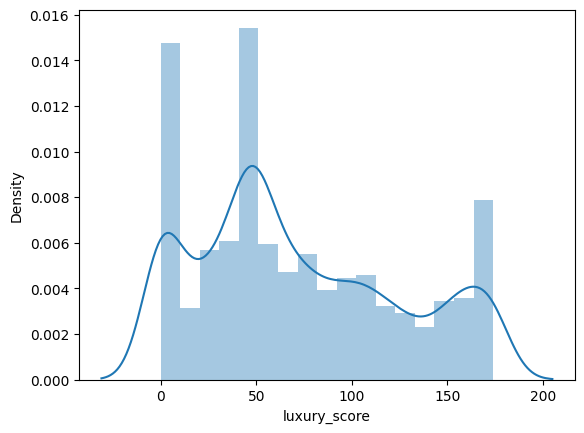

In [64]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

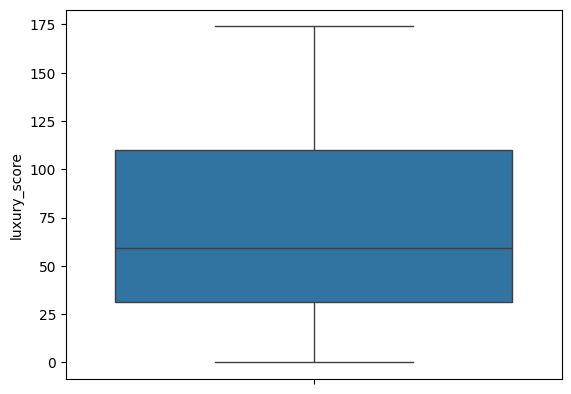

In [65]:
sns.boxplot(df['luxury_score'])

In [66]:
df.shape

(3588, 24)

In [67]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [68]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,4.0,North,New Property,NaN,1727.0,NaN,1017.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0
1,flat,tulip violet,sector 69,1.43,8888.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,1.0,North-West,Relatively New,NaN,1608.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,86.0
3,flat,indiabulls centrum park,sector 103,2.45,8522.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,11.0,East,Relatively New,NaN,2875.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,38.0
4,house,my home,new sector 2,0.34,12593.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,NaN,West,Moderately Old,3.0,NaN,270.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,22.0
5,house,ansals palam vihar,sector 2,5.70,14729.0,3870.0,Plot area 430(359.53 sq.m.)Built Up area: 4550...,5.0,5.0,2,NaN,North-East,Old Property,2.0,NaN,4550.0,4450.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

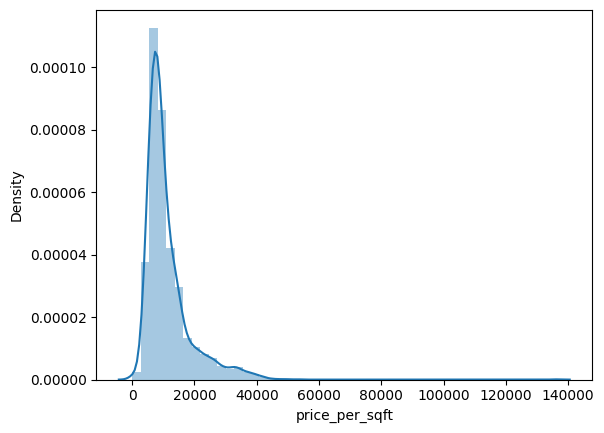

In [69]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

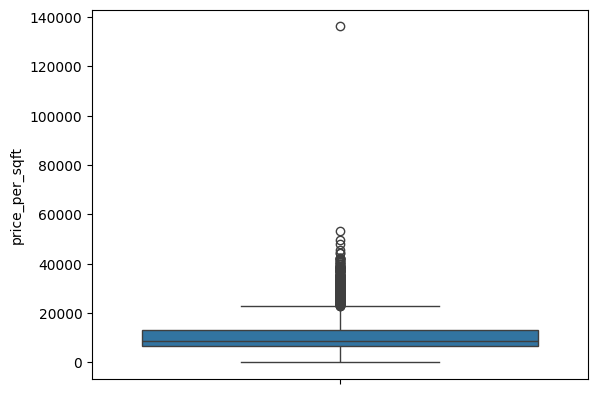

In [70]:
sns.boxplot(df['price_per_sqft'])

In [71]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
140,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,NaN,East,Relatively New,4.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0,60.0
814,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,NaN,North,Undefined,3.0,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
823,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0
2407,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,NaN,West,Relatively New,3.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,2.0,97.0
2902,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,NaN,North,New Property,4.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,7.0
2903,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,NaN,East,Relatively New,2.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,121.0
3088,house,unitech uniworld resorts,sector 33,11.5,53241.0,2160.0,Plot area 520(434.79 sq.m.),5.0,6.0,3+,NaN,East,Relatively New,4.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,84.0
3209,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,NaN,East,Moderately Old,3.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,103.0
3413,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,NaN,North-East,Relatively New,2.0,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,1.0,88.0
3444,house,independent,sector 26,16.0,136170.0,1175.0,Plot area 500(418.06 sq.m.),5.0,6.0,3,NaN,North-East,Old Property,2.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

np.float64(186.18)

In [73]:
df[(df['area']/df['bedRoom'])<186]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,house,my home,new sector 2,0.34,12593.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,NaN,West,Moderately Old,3.0,NaN,270.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,22.0
41,house,independent,sector 11,0.90,10000.0,900.0,Plot area 900(83.61 sq.m.),7.0,4.0,3+,NaN,NaN,Moderately Old,4.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,7.0
274,house,surendra homes dayaindependentd colony,sector 6,0.75,15625.0,480.0,Built Up area: 480 (44.59 sq.m.),4.0,4.0,2,NaN,NaN,Undefined,1.0,NaN,480.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,house,independent,sohna road road,0.95,8920.0,1065.0,Plot area 1065(98.94 sq.m.),10.0,10.0,3+,NaN,NaN,New Property,3.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,house,independent,sohna road road,1.20,22305.0,538.0,Plot area 50,4.0,4.0,3+,NaN,West,Old Property,4.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3666,house,independent,sector 2,3.65,23443.0,1557.0,Plot area 173(144.65 sq.m.),9.0,9.0,3+,NaN,West,New Property,3.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,116.0
3671,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4.0,4.0,2,NaN,North,Moderately Old,4.0,NaN,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
3706,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2.0,2.0,2,NaN,NaN,Undefined,1.0,NaN,NaN,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3749,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5.0,3.0,2,NaN,East,Old Property,2.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0


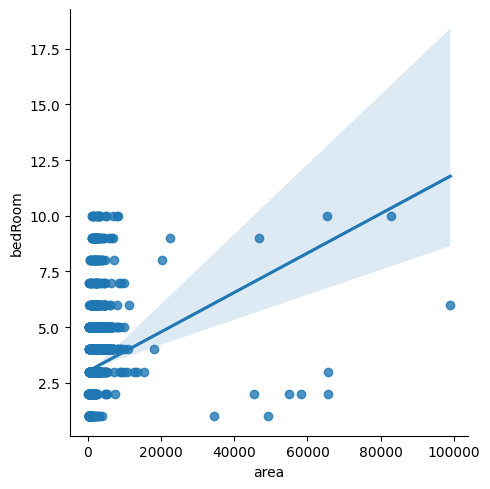

In [74]:
sns.lmplot(data = df, x = 'area', y = 'bedRoom')

In [75]:
df['area_room_ratio'] = df['area'] / df['bedRoom']

In [76]:
df[df['area_room_ratio'] < 250]['bedRoom'].value_counts()

bedRoom
2.0     47
3.0     33
5.0     29
4.0     17
6.0     16
9.0     15
8.0     12
7.0      8
10.0     7
Name: count, dtype: int64

In [77]:
df = df[df['area_room_ratio'] > 100]

In [79]:
outliers_df = df[ (df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [80]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / outliers_df['floorNum']) 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\703930199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / outliers_df['floorNum'])


In [81]:
df.update(outliers_df)

In [82]:
df['area_room_ratio'] = df['area'] / df['bedRoom']

In [83]:
 df[ (df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
41,house,independent,sector 11,0.90,10000.0,900.0,Plot area 900(83.61 sq.m.),7.0,4.0,3+,NaN,NaN,Moderately Old,4.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,7.0,128.571429
65,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),9.0,9.0,3+,NaN,East,Relatively New,3.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,75.0,215.000000
239,house,independent,sector 4,1.10,6111.0,1800.0,Plot area 200(167.23 sq.m.),8.0,4.0,3+,NaN,West,Old Property,2.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,7.0,225.000000
312,house,independent,sohna road road,0.95,8920.0,1065.0,Plot area 1065(98.94 sq.m.),10.0,10.0,3+,NaN,NaN,New Property,3.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.500000
336,house,independent,sector 12,1.35,12217.0,1105.0,Plot area 150(125.42 sq.m.)Built Up area: 2052...,5.0,5.0,1,NaN,NaN,Old Property,3.0,NaN,2052.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,31.0,221.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,NaN,NaN,Old Property,1.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,29.0,120.600000
3615,house,iffco nagar and 17b rwa,sector 17,2.98,20566.0,1449.0,Plot area 161(134.62 sq.m.),6.0,6.0,3+,NaN,East,Relatively New,3.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,78.0,241.500000
3639,house,independent,sector 7,1.20,11194.0,1072.0,Built Up area: 1072 (99.59 sq.m.),5.0,4.0,2,NaN,NaN,Undefined,3.0,NaN,1072.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.400000
3666,house,independent,sector 2,3.65,23443.0,1557.0,Plot area 173(144.65 sq.m.),9.0,9.0,3+,NaN,West,New Property,3.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,116.0,173.000000


In [84]:
 df[ (df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(72, 25)

In [85]:
df.shape

(3568, 25)

In [86]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

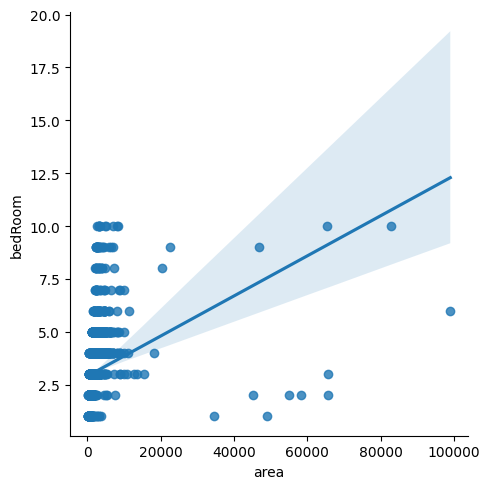

In [87]:
sns.lmplot(data = df, x = 'area', y = 'bedRoom')

In [88]:
df.shape

(3496, 25)

In [89]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,4.0,North,New Property,NaN,1727.0,NaN,1017.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0,575.666667
1,flat,tulip violet,sector 69,1.43,8888.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,1.0,North-West,Relatively New,NaN,1608.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,86.0,536.333333
3,flat,indiabulls centrum park,sector 103,2.45,8522.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,11.0,East,Relatively New,NaN,2875.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,38.0,718.750000
4,house,my home,new sector 2,0.34,12593.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,NaN,West,Moderately Old,3.0,NaN,270.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,22.0,135.000000
5,house,ansals palam vihar,sector 2,5.70,14729.0,3870.0,Plot area 430(359.53 sq.m.)Built Up area: 4550...,5.0,5.0,2,NaN,North-East,Old Property,2.0,NaN,4550.0,4450.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0,774.000000


In [90]:
df.to_csv('gurgoan_properties_outlier_treated.csv', index = False)